<a href="https://colab.research.google.com/github/Sanjeevp-07/SolarXchange_ML/blob/main/SolarXchange_fec_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib scikit-learn tensorflow


In [2]:
# Mount Google Drive if files are stored there
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/SolarXchange/intermittent-renewables-production-france.csv')  # Replace with your dataset path

# Check the first few rows
print(df.head())


               Date and Hour        Date StartHour   EndHour Source  \
0  2020-07-22 20:00:00+02:00  2020-07-22  20:00:00  21:00:00  Solar   
1  2020-07-23 07:00:00+02:00  2020-07-23  07:00:00  08:00:00  Solar   
2  2020-07-23 16:00:00+02:00  2020-07-23  16:00:00  17:00:00  Solar   
3  2020-07-23 19:00:00+02:00  2020-07-23  19:00:00  20:00:00  Solar   
4  2020-07-23 23:00:00+02:00  2020-07-23  23:00:00  24:00:00  Solar   

   Production  dayOfYear    dayName monthName  
0       244.0        204  Wednesday      July  
1       223.0        205   Thursday      July  
2      2517.0        205   Thursday      July  
3       658.0        205   Thursday      July  
4         0.0        205   Thursday      July  


<ipython-input-5-84b08479817c>:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['Date and Hour'] = pd.to_datetime(data['Date and Hour'])
<ipython-input-5-84b08479817c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date and Hour'] = pd.to_datetime(data['Date and Hour'])


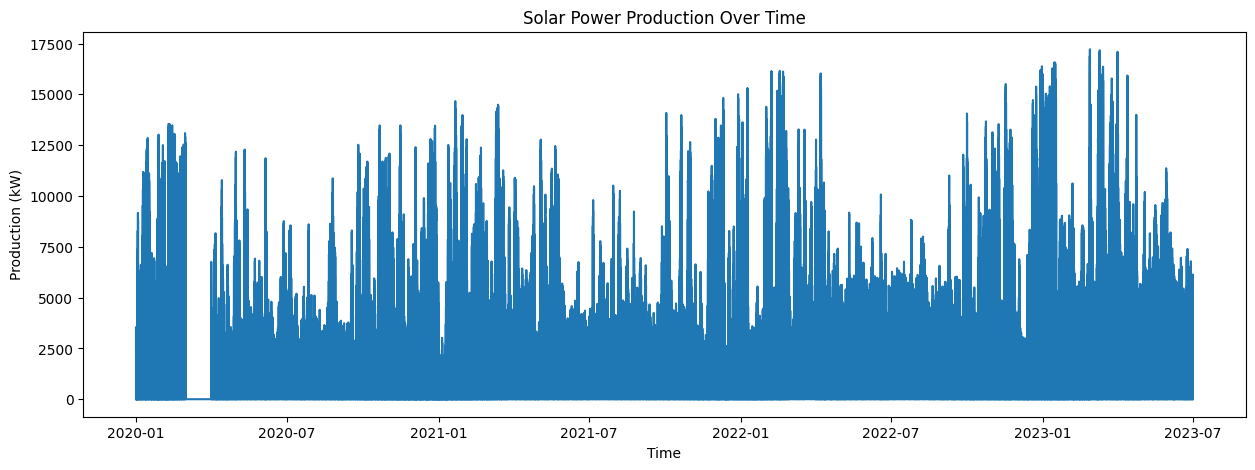

                           Production
Date and Hour                        
2020-01-01 00:00:00+01:00         0.0
2020-01-01 00:00:00+01:00      3549.0
2020-01-01 01:00:00+01:00         0.0
2020-01-01 01:00:00+01:00      2952.0
2020-01-01 02:00:00+01:00         0.0


In [5]:
# Focus only on 'Date and Hour' and 'Production'
data = df[['Date and Hour', 'Production']]

# Convert 'Date and Hour' to datetime format
data['Date and Hour'] = pd.to_datetime(data['Date and Hour'])

# Set 'Date and Hour' as index
data.set_index('Date and Hour', inplace=True)

# Sort by Date (important for time series)
data = data.sort_index()

# Plot to see the energy production pattern
plt.figure(figsize=(15,5))
plt.plot(data['Production'])
plt.title('Solar Power Production Over Time')
plt.xlabel('Time')
plt.ylabel('Production (kW)')
plt.show()

# Display final prepared data
print(data.head())


                           Production
Date and Hour                        
2020-01-01 00:00:00+01:00    0.000000
2020-01-01 00:00:00+01:00    0.206098
2020-01-01 01:00:00+01:00    0.000000
2020-01-01 01:00:00+01:00    0.171429
2020-01-01 02:00:00+01:00    0.000000


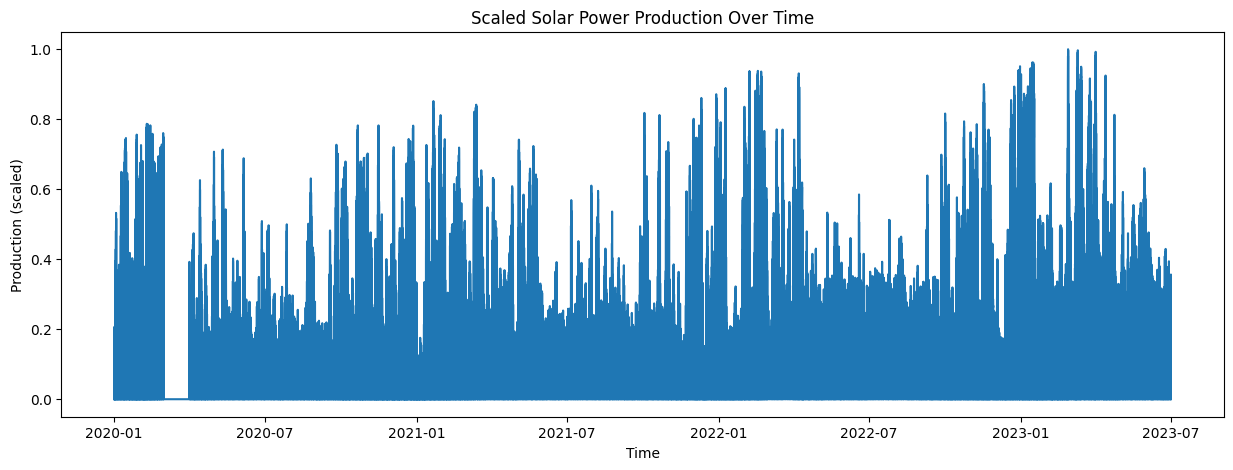

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform the production values
data['Production'] = scaler.fit_transform(data[['Production']])

# Show scaled data
print(data.head())

# Plot scaled data
plt.figure(figsize=(15,5))
plt.plot(data['Production'])
plt.title('Scaled Solar Power Production Over Time')
plt.xlabel('Time')
plt.ylabel('Production (scaled)')
plt.show()


In [7]:
import numpy as np

# Define how many past hours you want to use to predict the next hour
timesteps = 24  # You can change this to 48, 72, etc. if you want

# Create sequences
X = []
y = []

for i in range(timesteps, len(data)):
    X.append(data['Production'].values[i-timesteps:i])
    y.append(data['Production'].values[i])

X, y = np.array(X), np.array(y)

# Reshape X for LSTM [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (59782, 24, 1)
y shape: (59782,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the model
model = Sequential()

# First LSTM Layer
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X.shape[1], 1)))

# Second LSTM Layer
model.add(LSTM(units=50, activation='relu'))

# Dense output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X, y, epochs=20, batch_size=32)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1869/1869 ━━━━━━━━━━━━━━━━━━━━ 49s 24ms/step - loss: nan
Epoch 2/20
1869/1869 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - loss: nan
Epoch 3/20
1869/1869 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - loss: nan
Epoch 4/20
1869/1869 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - loss: nan
Epoch 5/20
1869/1869 ━━━━━━━━━━━━━━━━━━━━ 83s 24ms/step - loss: nan
Epoch 6/20
1869/1869 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - loss: nan
Epoch 7/20
1869/1869 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - loss: nan
Epoch 8/20
1869/1869 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - loss: nan
Epoch 9/20
1869/1869 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - loss: nan
Epoch 10/20
1869/1869 ━━━━━━━━━━━━━━━━━━━━ 84s 25ms/step - loss: nan
Epoch 11/20
1649/1869 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: nan